# Exercise 1: 

In [10]:
import pandas as pd
import numpy as np
data=pd.read_csv('data.csv')
matrix=data.to_numpy()
vec_row=[]
vec_column=[]

def row_sum(arr) :
    for i in range(len(arr)) :
        sum = 0
        for j in range(len(arr[0])) :
            sum += arr[i][j]
        print("Sum of the row",i,"=",sum)
        vec_row.append(sum)
        
def column_sum(arr) :
    for i in range(len(arr)) :
        sum = 0
        for j in range(len(arr[0])) :
            sum += arr[j][i]
        print("Sum of the column",i,"=",sum)
        vec_column.append(sum)


row_sum(matrix)
column_sum(matrix)
print (vec_row, vec_column)



Sum of the row 0 = 141.9
Sum of the row 1 = 140.5
Sum of the row 2 = 112.19999999999999
Sum of the row 3 = 125.32000000000002
Sum of the row 4 = 122.80000000000001
Sum of the row 5 = 110.69999999999999
Sum of the row 6 = 139.10000000000002
Sum of the row 7 = 119.82
Sum of the row 8 = 131.60000000000002
Sum of the row 9 = 101.19999999999999
Sum of the column 0 = 143.19999999999996
Sum of the column 1 = 116.20000000000002
Sum of the column 2 = 108.19999999999999
Sum of the column 3 = 86.42000000000002
Sum of the column 4 = 113.8
Sum of the column 5 = 156.4
Sum of the column 6 = 141.8
Sum of the column 7 = 92.8
Sum of the column 8 = 160.39999999999998
Sum of the column 9 = 125.91999999999997
[141.9, 140.5, 112.19999999999999, 125.32000000000002, 122.80000000000001, 110.69999999999999, 139.10000000000002, 119.82, 131.60000000000002, 101.19999999999999] [143.19999999999996, 116.20000000000002, 108.19999999999999, 86.42000000000002, 113.8, 156.4, 141.8, 92.8, 160.39999999999998, 125.91999999

In [5]:
data.head()

,Col0,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9
0,21.8,1.2,22.3,7.30,21.7,33.2,0.5,12.4,2.8,18.7
1,13.5,14.5,2.1,5.60,21.7,13.5,32.1,4.7,24.5,8.3
2,23.7,11.5,9.1,5.60,22.8,3.2,2.1,4.7,23.9,5.6
3,11.6,7.0,18.6,3.32,1.7,4.7,24.5,8.3,13.5,32.1
4,22.8,3.2,2.1,5.60,11.6,7.0,18.6,3.3,24.7,23.9


In [11]:
vec_row1=np.sum(matrix, axis=1)
vec_column1=np.sum(matrix, axis=0)
print(vec_row1,vec_column1)

[141.9  140.5  112.2  125.32 122.8  110.7  139.1  119.82 131.6  101.2 ] [143.2  116.2  108.2   86.42 113.8  156.4  141.8   92.8  160.4  125.92]


# Exercise 2 :


In [18]:
import pandas as pd
from numpy import median
market=pd.read_csv('market_fact.csv')
orders=pd.read_csv('orders_dimen.csv')
orders

,Order_ID,Order_Date,Order_Priority,Ord_id
0,3,13-10-2010,LOW,Ord_1
1,293,01-10-2012,HIGH,Ord_2
2,483,10-07-2011,HIGH,Ord_3
3,515,28-08-2010,NOT SPECIFIED,Ord_4
4,613,17-06-2011,HIGH,Ord_5
...,...,...,...,...
5501,47360,08-10-2010,NOT SPECIFIED,Ord_5502
5502,52706,09-07-2012,LOW,Ord_5503
5503,54279,30-07-2011,HIGH,Ord_5504
5504,55558,09-08-2010,MEDIUM,Ord_5505


<AxesSubplot:>

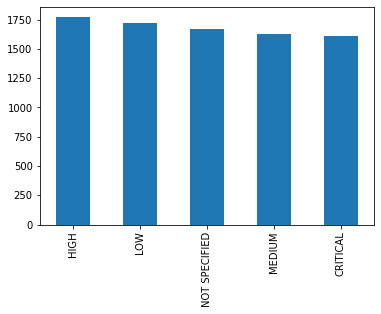

In [3]:
cust_order = pd.merge(market,orders, on = 'Ord_id', how = "inner")
cust_order['Order_Priority'].value_counts().plot(kind='bar')

In [19]:
cust_order[cust_order['Order_Priority']=='LOW' ]['Shipping_Cost'].median()

6.27

In [20]:
cust_order[cust_order['Order_Priority']=='HIGH' ]['Shipping_Cost'].median()

6.13

In [21]:
cust_order[cust_order['Order_Priority']=='NOT SPECIFIED' ]['Shipping_Cost'].median()

5.965

In [22]:
cust_order[cust_order['Order_Priority']=='MEDIUM' ]['Shipping_Cost'].median()

6.12

In [23]:
cust_order[cust_order['Order_Priority']=='CRITICAL' ]['Shipping_Cost'].median()

5.99

In [54]:
#Merging the data
list=orders["Order_Priority"]
fin=list.value_counts()
op=fin.index
max=0
for i in op:
    #Take only one category of order priority
    res =cust_order[cust_order["Order_Priority"]==i]

    #Take the column of shipping cost
    sc=res["Shipping_Cost"]

    #Convert the shipping costs into a matrix
    mat=sc.to_numpy()

    #With numpy, find the median
    median=np.median(mat)
    print('Median of',i , ':',median )
    
    #Keep the greatest median
    if(max<median):
        max=median
print('Greatest median : ', max)

Median of HIGH : 6.13
Median of LOW : 6.27
Median of CRITICAL : 5.99
Median of NOT SPECIFIED : 5.965
Median of MEDIUM : 6.12
Greatest median :  6.27


In [53]:
orders['Order_Priority'].value_counts().index

Index(['HIGH', 'LOW', 'CRITICAL', 'NOT SPECIFIED', 'MEDIUM'], dtype='object')

In [58]:
cust_order[cust_order["Order_Priority"]=='LOW']['Shipping_Cost']

5       26.30
18       6.81
28       4.00
30       6.89
38       2.27
        ...  
8371     8.99
8378    48.20
8379     5.34
8389     0.98
8396     6.92
Name: Shipping_Cost, Length: 1720, dtype: float64